In [1]:
%matplotlib inline

import numpy as np

# Generate white noise timeseries for all filters
# 10s of samples at 16,384kHz
white = np.random.randn(10*16384)

# Filters GWpy

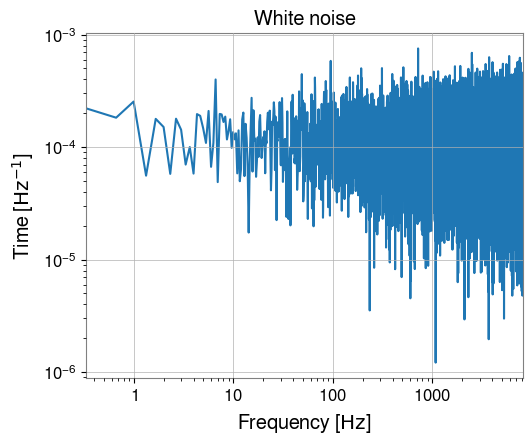

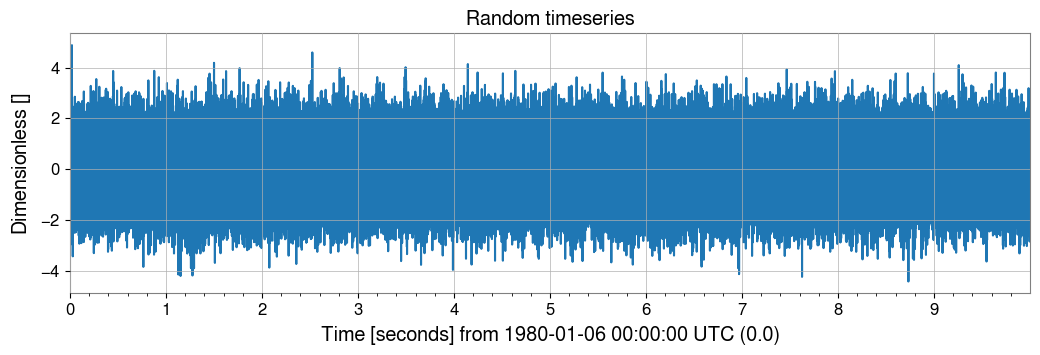

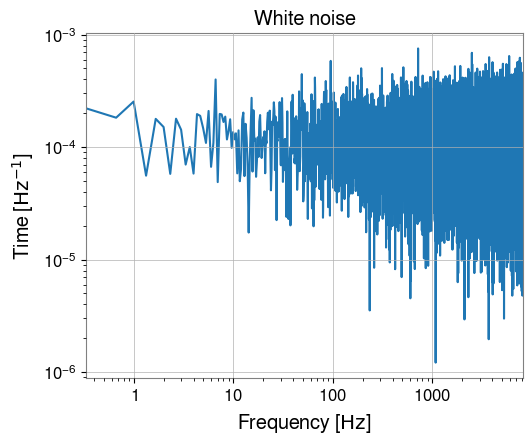

In [2]:
from gwpy.timeseries import TimeSeries

wh = TimeSeries(white, dt=1./16384.)

wh.plot(title="Random timeseries")
wh.psd(3).plot(title="White noise")

## Low pass

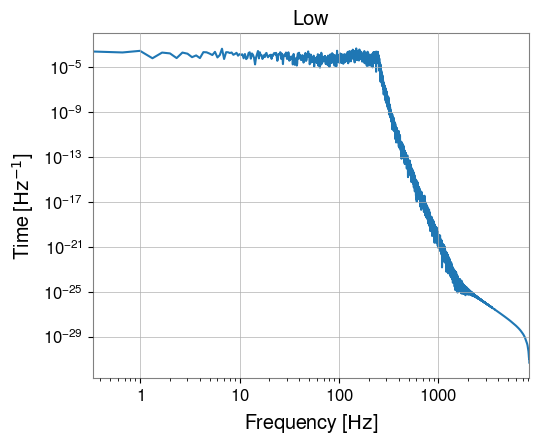

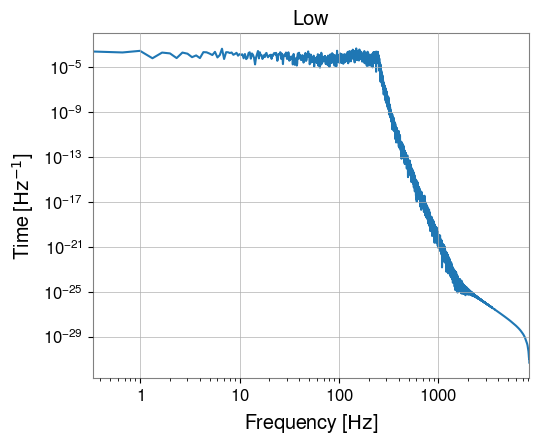

In [3]:
wh.lowpass(250).psd(3).plot(title="Low")

## Low pass - decimate

## High-pass

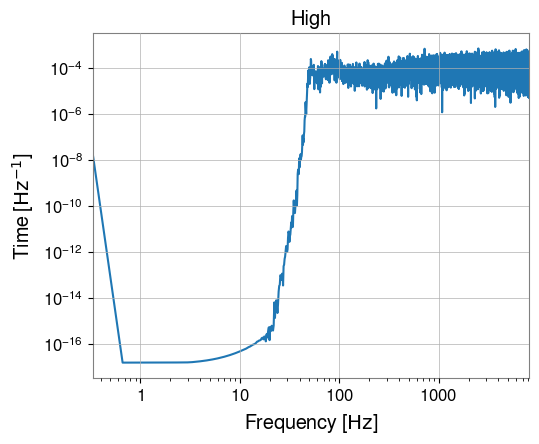

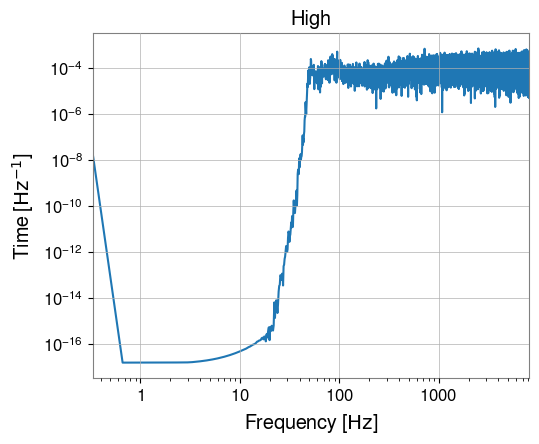

In [4]:
wh.highpass(50).psd(3).plot(title="High")

## Band-pass

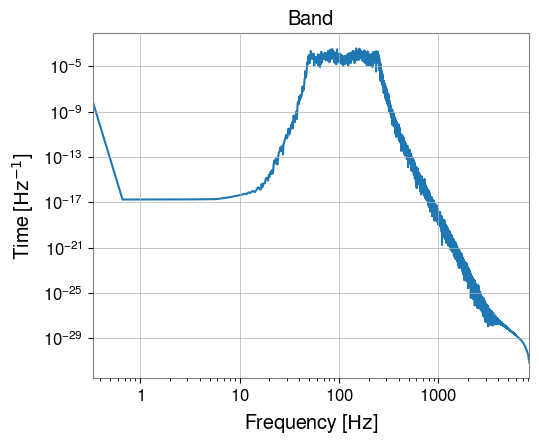

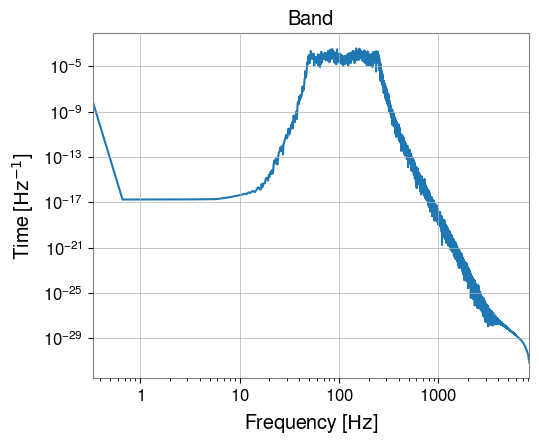

In [5]:
wh.bandpass(50, 250).psd(3).plot(title="Band")

Band-pass filter may be construced by cascading low pass-filter and high-pass. Verify by comparing both power spectral densities.

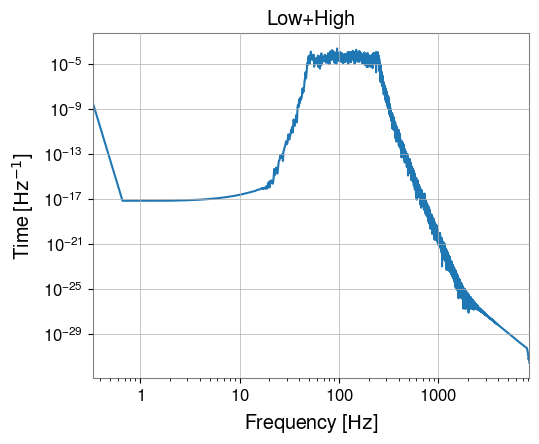

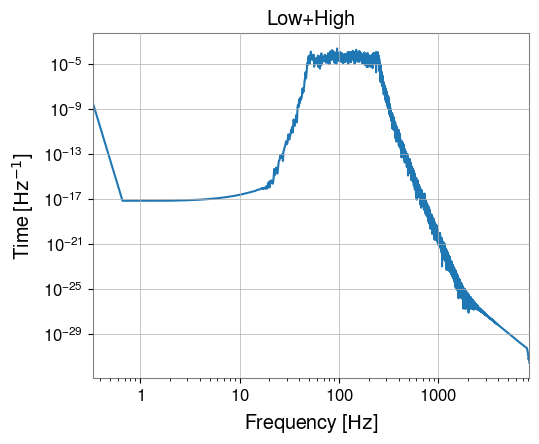

In [6]:
wh.highpass(50).lowpass(250).psd(3).plot(title="Low+High")

## Notch (band-stop)

In [ ]:
wh.notch(60).psd(3).plot(title="Notch")

# Filters PyCBC

In [ ]:
from pycbc.types import TimeSeries  # This TimeSeries substitutes the previous one.
import pycbc.filter
import pylab

# Generate white noise timeseries
# 10s of samples at 16,384kHz
#white = np.random.randn(10*16384)
wh = TimeSeries(white, delta_t=1./16384.)  # Notice: dt is no longer a valid argument.

pylab.plot(wh.sample_times, wh)
pylab.title("Random timeseries")
pylab.xlabel("Time [s]")
pylab.show()
wh_psd = wh.psd(3)
pylab.loglog(wh_psd.sample_frequencies, wh_psd)
pylab.title("White noise")
pylab.xlabel("Frequency [Hz]")

## Low pass

In [ ]:
lp = pycbc.filter.lowpass_fir(wh, 250., 8)
lp_psd = lp.psd(3)
pylab.loglog(lp_psd.sample_frequencies, lp_psd)

## Low pass - decimate

In [ ]:
# High frequencies are filtered because ther are no longer in the timeseries due to Nyquist theorem.

lp = pycbc.filter.resample_to_delta_t(wh, 1.0/2048)  # Not every delta_t are supported
lp_psd = lp.psd(3)
pylab.loglog(lp_psd.sample_frequencies, lp_psd)

## High-pass

In [ ]:
# gwpy like filter

hp = pycbc.filter.highpass(wh, 50.)
hp_psd = hp.psd(3)
pylab.loglog(hp_psd.sample_frequencies, hp_psd)

In [ ]:
# FIR

hp = pycbc.filter.highpass_fir(wh, 50., 512.0)
hp_psd = hp.psd(3)
pylab.loglog(hp_psd.sample_frequencies, hp_psd)

## Band-pass

In [ ]:
# In pycbc must be built with LP and HP.

## Notch (band-stop)

In [ ]:
# FIR

no = pycbc.filter.notch_fir(wh, 50., 60., 4096)  # Notice filter order!
no_psd = no.psd(3)
pylab.loglog(no_psd.sample_frequencies, no_psd)